In [4]:
import pandas as pd
import os

joined_paths = [os.path.join('files', path) for path in os.listdir("files")]
joined_paths

df = pd.concat(map(pd.read_csv, joined_paths), ignore_index=True)

In [5]:
df_upd = df.copy()
df_upd = df_upd.dropna(subset=['price','img_ref'])
df_upd = df_upd[["title", "price", "cat_1", "cat_2", "cat_3", "caracteristics", 'img_ref']]
for idx, row in df_upd.iterrows():
    if not os.path.isfile(row["img_ref"]):
        print(idx)
        print(row)

11160
title             –Т–µ—А—В–Є–Ї–∞–ї—М–љ–∞—П/–≥–Њ—А–Є–Ј–Њ–љ—В–∞–ї—...
price                                                   276 000 вВљ
cat_1                                                    ZonaSporta
cat_2                             –°–Є–ї–Њ–≤—Л–µ —В—А–µ–љ–∞–∂–µ—А—Л
cat_3                   –У—А—Г–Ј–Њ–±–ї–Њ—З–љ—Л–µ —В—А–µ–љ–∞–∂–µ—А—Л
caracteristics                                                  NaN
img_ref           images/gruzoblochnye_trenazhery/573_zonasporta...
Name: 11160, dtype: object


In [6]:
df_upd = df_upd.drop(11160)
df_upd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14702 entries, 0 to 18270
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           14702 non-null  object
 1   price           14702 non-null  object
 2   cat_1           14702 non-null  object
 3   cat_2           14702 non-null  object
 4   cat_3           14662 non-null  object
 5   caracteristics  13330 non-null  object
 6   img_ref         14702 non-null  object
dtypes: object(7)
memory usage: 918.9+ KB


In [7]:
for idx, row in df_upd.iterrows():
    if not os.path.isfile(row["img_ref"]):
        print(idx)
        print(row)

In [8]:
def get_label(text):
    label = text.split('/')[1]
    return label


def get_dealer(text):
    file_name = text.split("/")[2]
    dealer = file_name.split("_")[1]
    return dealer


df_upd['target'] = df_upd['img_ref'].apply(lambda x: get_label(x))
df_upd["dealer"] = df_upd["img_ref"].apply(lambda x: get_dealer(x))
df_upd.head(5)

,title,price,cat_1,cat_2,cat_3,caracteristics,img_ref,target,dealer
0,Беговая дорожка UNIXFIT MX-990X,120890,Беговые дорожки,UNIXFIT,UNIXFIT MX-990X,Тип электрическая Уровень базовый Габариты (Д...,images/begovye_dorozhki/1_begdorozhki_1349.jpeg,begovye_dorozhki,begdorozhki
1,"Беговая дорожка Proxima Ivetta HRC, Арт. PROT-219",139990,Беговые дорожки,Proxima,"Proxima Ivetta HRC, Арт. PROT-219",Тип электрическая Уровень базовый Габариты (Д...,images/begovye_dorozhki/2_begdorozhki_1463.jpeg,begovye_dorozhki,begdorozhki
2,"Беговая дорожка UNIXFIT MX-990 AC (10,1"" TFT)",159890,Беговые дорожки,UNIXFIT,"UNIXFIT MX-990 AC (10,1"" TFT)",Тип электрическая Уровень полупрофессиональны...,images/begovye_dorozhki/3_begdorozhki_1638.jpeg,begovye_dorozhki,begdorozhki
3,Беговая дорожка Titanium Masters Physiotech TLF,164990,Беговые дорожки,Titanium,Titanium Masters Physiotech TLF,Тип электрическая Уровень базовый Габариты (Д...,images/begovye_dorozhki/4_begdorozhki_1264.jpeg,begovye_dorozhki,begdorozhki
4,Беговая дорожка Laufstein Commercial,175990,Беговые дорожки,Laufstein,Laufstein Commercial,Тип электрическая Уровень профессиональный Га...,images/begovye_dorozhki/5_begdorozhki_0991.jpeg,begovye_dorozhki,begdorozhki


In [9]:
import re

df_upd['price'] = df_upd['price'].apply(lambda x: str(x).split('.')[0])
df_upd["price"] = df_upd["price"].apply(lambda x: re.sub(r"[^\d]+", "", str(x)))
df_upd["price"] = pd.to_numeric(df_upd["price"])
df_upd.tail(5)

,title,price,cat_1,cat_2,cat_3,caracteristics,img_ref,target,dealer
18262,Велотренажер AeroFIT Encore ECU7 LED,275010,ZonaSporta,Велотренажеры,AeroFIT,Тип нагрузки: Самогенерирующий мотор Количеств...,images/velotrenazhery/546_zonasporta_72110.jpeg,velotrenazhery,zonasporta
18263,Велотренажер Orlauf Lark,36600,ZonaSporta,Велотренажеры,Orlauf,Посадка: вертикальная Максимальный вес пользов...,images/velotrenazhery/547_zonasporta_72115.jpeg,velotrenazhery,zonasporta
18264,Велоэргометр с генератором профессиональный Br...,206990,ZonaSporta,Велотренажеры,Bronze Gym,Назначение: профессиональное Посадка: го...,images/velotrenazhery/548_zonasporta_72554.jpeg,velotrenazhery,zonasporta
18267,Велотренажер DFC B504RWO,18990,ZonaSporta,Велотренажеры,DFС,Инерционный вес маховика: 9 кг Маховик: 4 кг С...,images/velotrenazhery/551_zonasporta_72533.jpeg,velotrenazhery,zonasporta
18270,Аэро велосипед Altezani AB004,29600,ZonaSporta,Велотренажеры,Altezani,дисплей: скорость/ время /расст/ Ккал система ...,images/velotrenazhery/554_zonasporta_62642.jpeg,velotrenazhery,zonasporta


In [10]:
import unicodedata

df_upd = df_upd.drop_duplicates()
df_upd["cat_2"] = df_upd["cat_2"].apply(lambda x: str(x).strip())
df_upd["cat_2"] = df_upd["cat_2"].apply(lambda x: x if len(x) > 1 else "")
df_upd["cat_1"] = df_upd["cat_1"].apply(lambda x: x if len(x) > 1 else "")
df_upd["cat_1"] = df_upd["cat_1"].apply(
    lambda x: str(x)
    .replace("ZonaSporta", "")
    .replace("арт", "")
    .replace("Читать обзор на товар", "")
    .strip()
)
df_upd["caracteristics"] = df_upd["caracteristics"].apply(
    lambda x: str(x).replace(":: ", ": ").replace("\xa0", "")
)
df_upd["caracteristics"] = df_upd["caracteristics"].apply(
    lambda x: unicodedata.normalize("NFKD", x)
)
df = df.reset_index(drop=True)

In [11]:
df_upd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14702 entries, 0 to 18270
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           14702 non-null  object
 1   price           14702 non-null  int64 
 2   cat_1           14702 non-null  object
 3   cat_2           14702 non-null  object
 4   cat_3           14662 non-null  object
 5   caracteristics  14702 non-null  object
 6   img_ref         14702 non-null  object
 7   target          14702 non-null  object
 8   dealer          14702 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


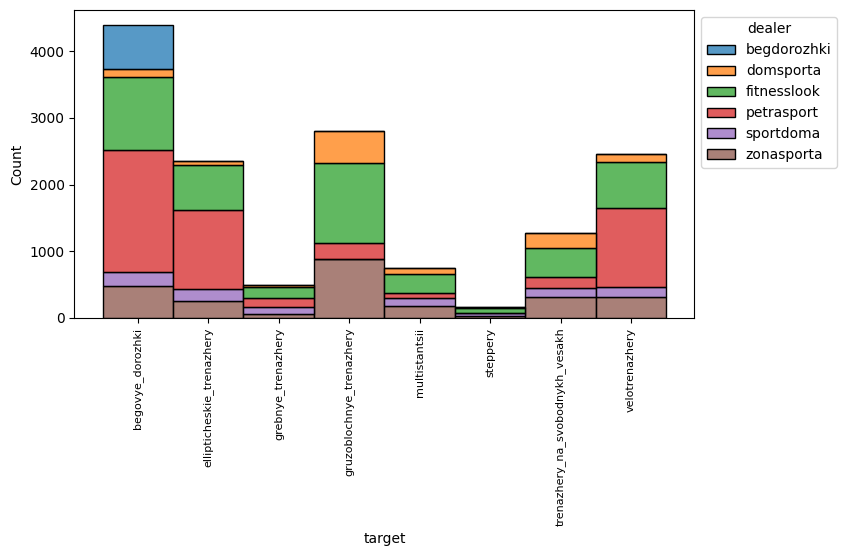

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
ax = sns.histplot(
    data=df_upd, x="target", hue="dealer", multiple="stack")
plt.xticks(rotation=90, fontsize = 8)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [13]:
company_data = df_upd[df_upd['dealer'] == 'sportdoma']
comparable_data = df_upd[df_upd["dealer"] != "sportdoma"]

In [14]:
company_data.to_csv("company_data.csv", index=False)
comparable_data.to_csv("comparable_data.csv", index=False)